## Imports

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from data.dataset import Dataset
import data.data_selector as ds
import utils.data_processing as dp
import utils.plot_functions as pf
import analysis.analysis_picker as ap

In [3]:
analysis_params = {
  "model_type": "subspace_lca",
  "model_name": "subspace_lca",
  "version": "1.0",
  "save_info": "analysis",
  "overwrite_analysis": False}

# Computed params
analysis_params["model_dir"] = (os.path.expanduser("~")+"/Work/Projects/"+analysis_params["model_name"])

In [4]:
analyzer = ap.get_analyzer(analysis_params)
analyzer.model.setup(analyzer.model_params, analyzer.model_schedule)
analyzer.load_analysis(save_info=analysis_params["save_info"])

In [5]:
analyzer = ap.get_analyzer(analysis_params)
analyzer.model.setup(analyzer.model_params, analyzer.model_schedule)
analyzer.load_analysis(save_info=analysis_params["save_info"])

In [6]:
neuron_indices = [idx for ids in analyzer.model.group_ids for idx in ids]

In [7]:
weights = np.reshape(analyzer.evals["weights/phi:0"].T, [analyzer.model.num_neurons,
  int(np.sqrt(analyzer.model.num_pixels)), int(np.sqrt(analyzer.model.num_pixels))])

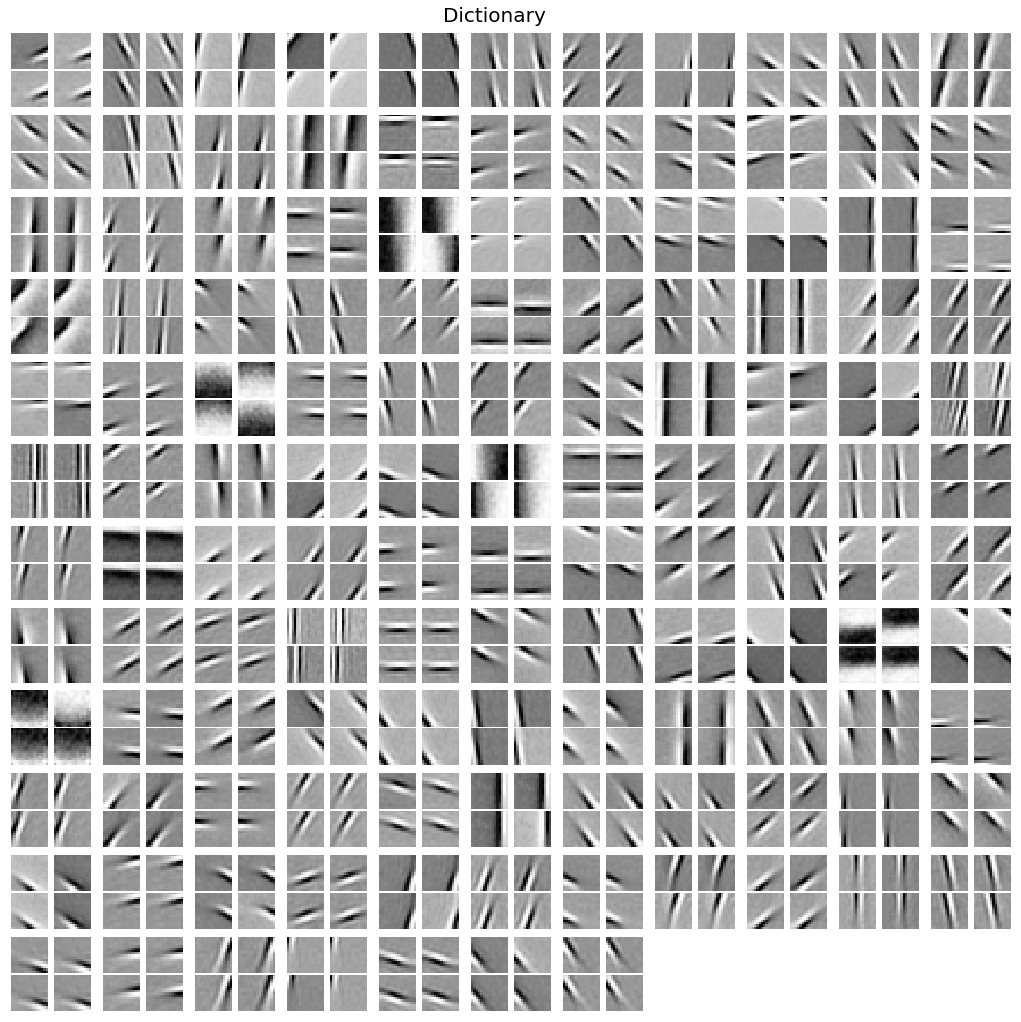

In [9]:
dict_fig = pf.plot_group_weights(weights, analyzer.model.group_ids, title="Dictionary", figsize=(18,18))
dict_fig.savefig(analyzer.analysis_out_dir+"/vis/"+analysis_params["model_name"]+"_group_dict.png")

In [ ]:
# Plot dictionary stats that are common per group?
# i.e. within group envelope parameters (centers / phase / etc) that are shared or close
